### 1. Load Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from lib.cluster import kmeans, find_best_cluster, feature_importance
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### 2. Load Data

In [2]:
file_loc = "/Users/alexcheng/Desktop/2016-2017.csv"

df = pd.read_csv(file_loc)
df.head()

,Season,Player,Pos,Player_ID,Age,G,MP,PER,TS%,3PAr,...,16<3_FG%,3P%,%ASTd_2P,%FGA_DUNK,DUNKS,%ASTd_3P,%_CORNER3PA,3P%_CORNER3,HEAVE_ATT,HEAVE_MD
0,2016-17,A.J. Hammons,C,hammoaj01,24,17.0,77.0,9.7,0.455,0.273,...,0.500,0.667,0.800,0.091,2,1.000,0.167,0.000,0,0
1,2016-17,Aaron Brooks,PG,brookaa01,32,46.0,660.0,10.3,0.505,0.447,...,0.375,0.337,0.103,0.000,0,0.529,0.119,0.417,5,1
2,2016-17,Aaron Gordon,SF,gordoaa01,21,56.0,1548.0,12.5,0.503,0.342,...,0.299,0.289,0.457,0.086,46,0.875,0.273,0.264,2,0
3,2016-17,Aaron Harrison,SG,harriaa01,22,5.0,17.0,-2.1,0.102,0.500,...,0.000,0.000,0.000,0.000,0,0.000,0.500,0.000,0,0
4,2016-17,Adreian Payne,PF,paynead01,25,12.0,92.0,14.3,0.526,0.256,...,0.500,0.200,0.733,0.051,2,1.000,0.100,0.000,0,0


In [3]:
df.columns

Index([u'Season', u'Player', u'Pos', u'Player_ID', u'Age', u'G', u'MP', u'PER',
       u'TS%', u'3PAr', u'FTr', u'ORB%', u'DRB%', u'TRB%', u'AST%', u'STL%',
       u'BLK%', u'TOV%', u'USG%', u'OWS', u'DWS', u'WS', u'WS/48', u'OBPM',
       u'DBPM', u'BPM', u'VORP', u'url', u'Games', u'Min_Played', u'FG%',
       u'AVG_DIST_FGA', u'%FGA_2P', u'%FGA_0-3ft', u'%FGA_3-10ft',
       u'%FGA_10-16ft', u'%FGA_16ft<3', u'%FGA_3P', u'2P%', u'0-3_FG%',
       u'3-10_FG%', u'10-16_FG%', u'16<3_FG%', u'3P%', u'%ASTd_2P',
       u'%FGA_DUNK', u'DUNKS', u'%ASTd_3P', u'%_CORNER3PA', u'3P%_CORNER3',
       u'HEAVE_ATT', u'HEAVE_MD'],
      dtype='object')

In [4]:
df.drop(['Season', 'Player_ID', 'Age', 'url', 'MP', 'Games', 
         'Min_Played', 'DUNKS','HEAVE_ATT', 'HEAVE_MD', 'PER',
         'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
         'VORP'], 
         axis=1, inplace=True)

In [5]:
df.shape

(463, 33)

In [6]:
df.columns

Index([u'Player', u'Pos', u'G', u'TS%', u'3PAr', u'FTr', u'ORB%', u'DRB%',
       u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'FG%',
       u'AVG_DIST_FGA', u'%FGA_2P', u'%FGA_0-3ft', u'%FGA_3-10ft',
       u'%FGA_10-16ft', u'%FGA_16ft<3', u'%FGA_3P', u'2P%', u'0-3_FG%',
       u'3-10_FG%', u'10-16_FG%', u'16<3_FG%', u'3P%', u'%ASTd_2P',
       u'%FGA_DUNK', u'%ASTd_3P', u'%_CORNER3PA', u'3P%_CORNER3'],
      dtype='object')

### 3. Data Preprocessing

#### Scale the data

In [7]:
X = df.drop(['Player', 'Pos', 'G'], axis=1)
y = df['Pos']

In [9]:
X.columns

Index([u'TS%', u'3PAr', u'FTr', u'ORB%', u'DRB%', u'TRB%', u'AST%', u'STL%',
       u'BLK%', u'TOV%', u'USG%', u'FG%', u'AVG_DIST_FGA', u'%FGA_2P',
       u'%FGA_0-3ft', u'%FGA_3-10ft', u'%FGA_10-16ft', u'%FGA_16ft<3',
       u'%FGA_3P', u'2P%', u'0-3_FG%', u'3-10_FG%', u'10-16_FG%', u'16<3_FG%',
       u'3P%', u'%ASTd_2P', u'%FGA_DUNK', u'%ASTd_3P', u'%_CORNER3PA',
       u'3P%_CORNER3'],
      dtype='object')

In [10]:
X.head()

,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,...,0-3_FG%,3-10_FG%,10-16_FG%,16<3_FG%,3P%,%ASTd_2P,%FGA_DUNK,%ASTd_3P,%_CORNER3PA,3P%_CORNER3
0,0.455,0.273,0.455,7.2,24.0,15.2,4.1,0.0,7.0,10.2,...,0.333,0.000,0.250,0.500,0.667,0.800,0.091,1.000,0.167,0.000
1,0.505,0.447,0.128,2.4,6.4,4.4,22.5,1.7,1.0,17.3,...,0.425,0.441,0.640,0.375,0.337,0.103,0.000,0.529,0.119,0.417
2,0.503,0.342,0.244,5.1,13.4,9.1,11.2,1.3,1.3,9.1,...,0.686,0.322,0.411,0.299,0.289,0.457,0.086,0.875,0.273,0.264
3,0.102,0.500,0.500,0.0,18.9,9.5,22.7,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.000
4,0.526,0.256,0.385,7.4,18.0,12.6,7.0,2.8,3.7,13.3,...,0.364,0.667,0.750,0.500,0.200,0.733,0.051,1.000,0.100,0.000


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [21]:
#randomforestclassifier feature_importance_

### 4. Dimensionality Reduction

#### Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs.

The general LDA approach is very similar to a Principal Component Analysis (for more information about the PCA, see the previous article Implementing a Principal Component Analysis (PCA) in Python step by step), but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).

Source: [sebastianrashka.com](http://sebastianraschka.com/Articles/2014_python_lda.html#introduction)

In [8]:
LDA = LinearDiscriminantAnalysis(n_components=2)

In [9]:
LDA_reduced_df = LDA.fit(X_scaled,y).transform(X_scaled)

//anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [10]:
LDA.score(X_scaled,y)

0.83259911894273131

#### Principal Component Analysis

In [11]:
# try this with multiple dimensions

pca = PCA(n_components=2)
X_r = pca.fit(X_scaled).transform(X_scaled)

print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.27914046  0.24110523]


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


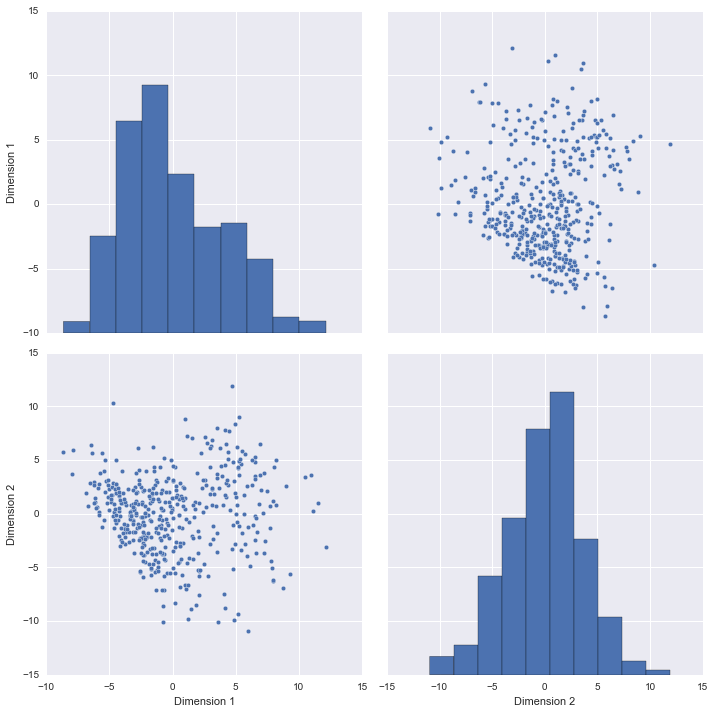

In [12]:
PCA_reduced_df = pd.DataFrame(X_r, columns=['Dimension 1', 'Dimension 2'])
reduced_scatter_matrix = sns.pairplot(PCA_reduced_df, size=5)

### 5. Measuring KMeans Silhouette Score to Find Best Cluster

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Source: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

#### Number of Clusters for PCA-reduced Data

For my PCA-reduced data, I have concluded that **10** is the best number of clusters.

best silhouette score: 0.369659274257


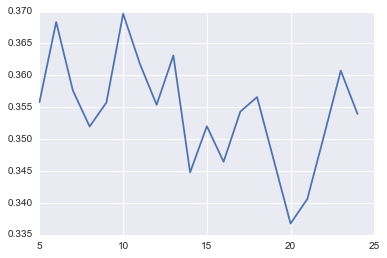

In [13]:
# this plot measures the silhouette scores of 5 clusters to 25 clusters
find_best_cluster(PCA_reduced_df,5,25)


# build randomness, feature transformation 8,4.2

#### Number of Clusters for LDA-reduced Data

For my LDA-reduced data, I have concluded that **18** is the best number of clusters.

best silhouette score: 0.366852451987


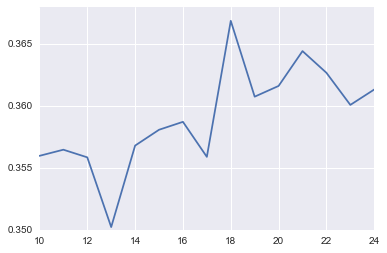

In [14]:
find_best_cluster(LDA_reduced_df,10,25)

### 6. Clustering

#### KMeans

In [15]:
kmeans_PCA = kmeans(PCA_reduced_df, 10)
kmeans_LDA = kmeans(LDA_reduced_df, 18)

In [17]:
df['PCA_labels'] = kmeans_PCA['labels']
df['LDA_labels'] = kmeans_LDA['labels']

In [18]:
df.head()

,Player,Age,Height,Weight,Pos,MP,FG,FGA,FG%,3P,...,AST%,STL%,BLK%,TOV%,USG%,OBPM,DPM,BPM,PCA_labels,LDA_labels
0,aaron brooks,32,73,161,PG,21.9,3.7,9.0,0.413,1.3,...,23.8,1.4,0.5,14.4,23.3,0,-2.4,-1.7,3,7
1,aaron gordon,21,81,220,SF,23.2,3.4,7.4,0.451,0.6,...,9.8,1.4,2.0,9.6,17.8,0,0.4,-0.2,9,3
2,aaron harrison,22,78,210,SG,4.2,0.2,0.9,0.217,0.1,...,6.0,2.7,0.0,12.1,13.6,0,-0.2,-6.4,0,13
3,adreian payne,25,82,237,PF,13.7,1.7,4.2,0.399,0.1,...,7.4,1.5,1.5,16.4,17.8,0,-0.8,-5.8,6,6
4,al horford,30,82,245,C,33.4,6.1,11.6,0.529,0.3,...,14.7,1.3,2.9,11.1,19.6,0,2.2,3.0,5,17


In [30]:
mask = (df['PCA_labels'] == 4)

df[mask][['Player']]

,Player
8,alan williams
30,arinze onuaku
37,bismack biyombo
39,boban marjanovic
69,cole aldrich
73,cristiano felicio
76,damian jones
79,daniel ochefu
108,dewayne dedmon
109,deyonta davis


### Feature Importance

In [31]:
X_mask = df[mask].drop(['Player', 'Pos', 'PCA_labels', 'LDA_labels'], axis=1)
feature_importance(X_mask)

,Features,Importance,Average
12,2P%,0.155354,0.569861
6,FG%,0.145185,0.562083
13,eFG%,0.145114,0.562833
43,TS%,0.128816,0.582333
33,0-3_FG%,0.127248,0.683278
52,TOV%,0.112330,16.297222
38,%FGA_DUNK,0.110676,0.209889
37,%ASTd_2P,0.099021,0.705417
28,%FGA_0-3ft,0.072588,0.617139
44,3PAr,0.068827,0.014083


- PCA_0: Backup Guards
- PCA_1: Backup Centers
- PCA_2: Shooting Wings
- PCA_3: Playmaking Guards
- PCA_4: Interior Finishers
- PCA_5: Offensive Forwards
- PCA_6: Backup Forwards
- PCA_7: Defensive Centers
- PCA_8: Offensive Wings
- PCA_9: Defensive Wings
